<a href="https://colab.research.google.com/github/dushyant-mishra/perceptron-colab-notebook/blob/main/1_deep_learning_perceptron_gates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
ROOT ="/content/drive/MyDrive/Colab Notebooks/ineuron/deep learning course/perceptron gates"

In [2]:
import os

os.chdir(ROOT)

In [3]:
!ls

'1 deep learning perceptron gates-iNeuron.ipynb'   models   plots   test.txt


In [4]:
assert ROOT == os.getcwd()

In [5]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/ineuron/deep learning course/perceptron gates'

In [6]:
with open("test.txt", "w") as f:
  f.writelines("hello colab")

## Implimentation of Perceptron


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib # FOR SAVING MY MODEL AS A BINARY FILE
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight") # THIS IS STYLE OF GRAPHS

In [8]:
np.random.randn(3) * 1e-4

array([ 3.46625662e-05, -2.30659744e-05,  8.15677791e-05])

In [9]:
-np.ones((4, 1))

array([[-1.],
       [-1.],
       [-1.],
       [-1.]])

In [10]:
np.c_[(1,1,1,1),-np.ones((4, 1))]

array([[ 1., -1.],
       [ 1., -1.],
       [ 1., -1.],
       [ 1., -1.]])

In [11]:
1e-4

0.0001

In [19]:
class Perceptron:
  def __init__(self, eta: float=None, epochs: int=None):
    self.weights = np.random.randn(3) * 1e-4 # Small weight initialization
    print(f"initial weights before training: \n{self.weights}")
    self.eta = eta # Learning rate
    self.epochs = epochs # iterations

  def _z_outcome(self, inputs, weights):
    return np.dot(inputs, weights) # z = W * X  
  
  def activationFunction(self, z):
    return np.where(z > 0, 1, 0) # Condition, IF TRUE, ELSE

  def fit(self, X, y):
    self.X = X
    self.y = y

    X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))] # Concatination
    print(f"X with bias: \n{X_with_bias}")

    for epoch in range(self.epochs):
      print("--"*10)
      print(f"for epoch: {epoch+1}")
      print("--"*10)

      z = self._z_outcome(X_with_bias, self.weights) 
      y_hat = self.activationFunction(z)  # foward propagation
      print(f"predicted value after forward pass: \n{y_hat}")
      
      self.error = self.y - y_hat
      print(f"error: \n{self.error}")

      total_loss = np.sum(self.error)
      print(f"total loss: {total_loss}")      # returns the sum of all the errors         
      
      self.weights = self.weights + self.eta * np.dot(X_with_bias.T, self.error) # backward propagation
      print(f"updated weights after epoch:\n{epoch+1}/{self.epochs} : \n{self.weights}")
      print("#####"*10)


  def predict(self, X):
    X_with_bias = np.c_[X, -np.ones((len(X), 1))]              #prediction is same as forward pass without the backward pass
    z= self._z_outcome(X_with_bias, self.weights)
    return self.activationFunction(z)

  def total_loss(self):
    total_loss = np.sum(self.error)
    print(f"total loss: {total_loss}")
    return total_loss


In [14]:
def prepare_data(df, target_col="y"):
  X = df.drop(target_col, axis=1)  #axis=1 for dropping y columns

  y = df[target_col]

  return X, y

In [29]:
def save_model(model, filename):
  model_dir = "models"
  os.makedirs(model_dir, exist_ok=True) # Only create a new directory if model_dir does not exist
  filePath = os.path.join(model_dir, filename) # models/filename
  joblib.dump(model, filePath)

In [20]:
AND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,0,0,1],
}

df_AND = pd.DataFrame(AND)

df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [21]:
X,y = prepare_data(df_AND)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_AND = Perceptron(eta=ETA, epochs=EPOCHS)
model_AND.fit(X, y)

_ = model_AND.total_loss()


initial weights before training: 
[1.39604755e-04 1.15196657e-04 2.77870165e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[0 1 1 1]
error: 
0    0
1   -1
2   -1
3    0
Name: y, dtype: int64
total loss: -2
updated weights after epoch:
1/10 : 
[-0.2998604  -0.2998848   0.60002779]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
total loss: 1
updated weights after epoch:
2/10 : 
[1.39604755e-04 1.15196657e-04 3.00027787e-01]
##################################################
--------------------
for epoch: 3
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
total loss: 1
updated weights after epoch:
3/10 : 
[3.00139605e-01 3.00115

In [22]:
model_AND.predict(X)

array([0, 0, 0, 1])

In [23]:
model_AND.predict(X=[[1,0]])

array([0])

In [24]:
X.values

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [25]:
inputs = np.array([[1,1], [0,1]])
model_AND.predict(inputs)

array([1, 0])

In [28]:
save_model(model_AND, "AND.model")  #saving the AND model

In [30]:
loaded_model = joblib.load("models/AND.model")  #loading saved model
loaded_model.predict(inputs)

array([1, 0])

In [31]:
OR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,1],
}

df_OR = pd.DataFrame(OR)

df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [32]:
X,y = prepare_data(df_OR)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_OR = Perceptron(eta=ETA, epochs=EPOCHS)
model_OR.fit(X, y)

_ = model_OR.total_loss()


initial weights before training: 
[-2.71780357e-05  9.42204405e-05  1.77599993e-04]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
total loss: 3
updated weights after epoch:
1/10 : 
[ 0.59997282  0.60009422 -0.8998224 ]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
total loss: -1
updated weights after epoch:
2/10 : 
[ 0.59997282  0.60009422 -0.5998224 ]
##################################################
--------------------
for epoch: 3
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
total loss: -1
updated weights after epoch:
3/10 : 
[ 0.59997282  0.60009422 -0.

In [33]:
model_OR.predict(X)

array([0, 1, 1, 1])

In [34]:
model_OR.predict(X=[[1,1]])

array([1])

In [41]:
save_model(model_OR, "OR.model")  #saving the OR model

In [42]:
loaded_model = joblib.load("models/OR.model")  #loading saved OR model
loaded_model.predict(inputs)  #inputs = np.array([[1,1], [0,1]]) from above

array([1, 1])

In [38]:
XOR = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [0,1,1,0],
}

df_XOR = pd.DataFrame(XOR)

df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [39]:
X,y = prepare_data(df_XOR)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_XOR = Perceptron(eta=ETA, epochs=EPOCHS)
model_XOR.fit(X, y)

_ = model_XOR.total_loss()
#model didn't work for XOR gate, it is a non-linear gate

initial weights before training: 
[ 6.08641310e-05 -2.10536977e-04 -1.22462687e-04]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 0 1 0]
error: 
0   -1
1    1
2    0
3    0
Name: y, dtype: int64
total loss: 0
updated weights after epoch:
1/10 : 
[ 6.08641310e-05  2.99789463e-01 -1.22462687e-04]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
total loss: -2
updated weights after epoch:
2/10 : 
[-2.99939136e-01 -2.10536977e-04  5.99877537e-01]
##################################################
--------------------
for epoch: 3
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
total loss: 2
updated weights after epoch:
3/10 : 
[ 6.0

In [40]:
save_model(model_XOR, "XOR.model")  #saving the XOR model

In [44]:
loaded_model = joblib.load("models/XOR.model")  #loading saved XOR model
loaded_model.predict(inputs)  #inputs = np.array([[1,1], [0,1]]) from above, looks like model did not give correct output

array([0, 0])

In [46]:
NAND = {
    "x1": [0,0,1,1],
    "x2": [0,1,0,1],
    "y": [1,1,1,0],
}

df_NAND = pd.DataFrame(NAND)

df_NAND

,x1,x2,y
0,0,0,1
1,0,1,1
2,1,0,1
3,1,1,0


In [47]:
X,y = prepare_data(df_NAND)

ETA = 0.3 # 0 and 1
EPOCHS = 10

model_NAND = Perceptron(eta=ETA, epochs=EPOCHS)
model_NAND.fit(X, y)

_ = model_NAND.total_loss()


initial weights before training: 
[ 9.51647893e-05  1.45007055e-06 -8.85863765e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch: 1
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0    0
1    0
2    0
3   -1
Name: y, dtype: int64
total loss: -1
updated weights after epoch:
1/10 : 
[-0.29990484 -0.29999855  0.29991141]
##################################################
--------------------
for epoch: 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
error: 
0    1
1    1
2    1
3    0
Name: y, dtype: int64
total loss: 3
updated weights after epoch:
2/10 : 
[ 9.51647893e-05  1.45007055e-06 -6.00088586e-01]
##################################################
--------------------
for epoch: 3
--------------------
predicted value after forward pass: 
[1 1 1 1]
error: 
0    0
1    0
2    0
3   -1
Name: y, dtype: int64
total loss: -1
updated weights after epoch:
3/10 : 
[-0.29990484 -0.

In [48]:
save_model(model_NAND, "NAND.model")  #saving the NAND model

In [49]:
loaded_model = joblib.load("models/NAND.model")  #loading saved NAND model
loaded_model.predict(inputs)  #inputs = np.array([[1,1], [0,1]]) from above

array([0, 1])

In [67]:
def save_plot(df, file_name, model):
  def _create_base_plot(df):                                                 # plots the data points and creates a base plot
    df.plot(kind="scatter", x="x1", y="x2", c="y", s=100, cmap="winter")
    plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
    plt.axvline(x=0, color="black", linestyle="--", linewidth=1)
    figure = plt.gcf() # get current figure
    figure.set_size_inches(10, 8)

  def _plot_decision_regions(X, y, classfier, resolution=0.02):              # plots the decision boundaries
    colors = ("magenta", "green", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[: len(np.unique(y))])        # since we have a binary classifier (perceptron) but listed 4 colors above it will take the first two colors for y output values

    X = X.values  # this is the x1 and x2 values as an array
    x1 = X[:, 0]  # first column
    x2 = X[:, 1]  # second column
    x1_min, x1_max = x1.min() -1 , x1.max() + 1
    x2_min, x2_max = x2.min() -1 , x2.max() + 1  

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    print(f"This is xx1:\n{xx1}")
    print(f"This is xx1.ravel: {xx1.ravel()}", end='\n')
    print(f"This is transpose xx1.ravel: {xx1.ravel().T}", end='\n')
    print(f"shape of xx1 is: {xx1.shape}", end='\n')
    
    Z = classfier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)  #ravel converts to 1D array
    Z = Z.reshape(xx1.shape)
    print(Z.reshape(xx1.shape), end='\n')

    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    plt.plot()



  X, y = prepare_data(df)

  _create_base_plot(df)
  _plot_decision_regions(X, y, model)

  plot_dir = "plots"
  os.makedirs(plot_dir, exist_ok=True) # Only create if plot_dir doesen't exist
  plotPath = os.path.join(plot_dir, file_name) # plots/filename
  plt.savefig(plotPath)

This is xx1:
[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
This is xx1.ravel: [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
This is transpose xx1.ravel: [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
shape of xx1 is: (150, 150)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


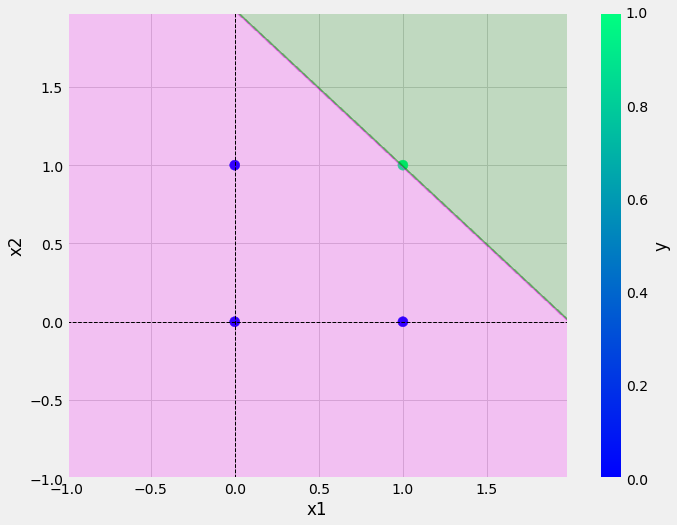

In [63]:
save_plot(df_AND, "and.png", model_AND)

This is xx1:
[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
This is xx1.ravel: [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
This is transpose xx1.ravel: [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
shape of xx1 is: (150, 150)
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


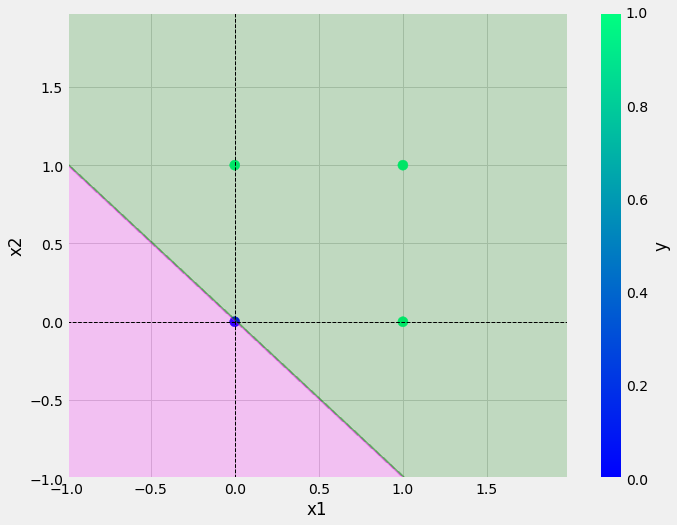

In [64]:
save_plot(df_OR, "or.png", model_OR)

This is xx1:
[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
This is xx1.ravel: [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
This is transpose xx1.ravel: [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
shape of xx1 is: (150, 150)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


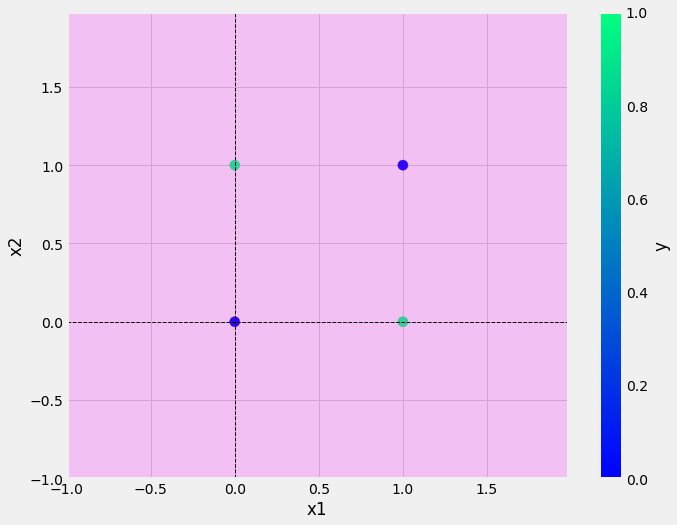

In [65]:
save_plot(df_XOR, "xor.png", model_XOR)

This is xx1:
[[-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 ...
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
 [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]]
This is xx1.ravel: [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
This is transpose xx1.ravel: [-1.   -0.98 -0.96 ...  1.94  1.96  1.98]
shape of xx1 is: (150, 150)
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


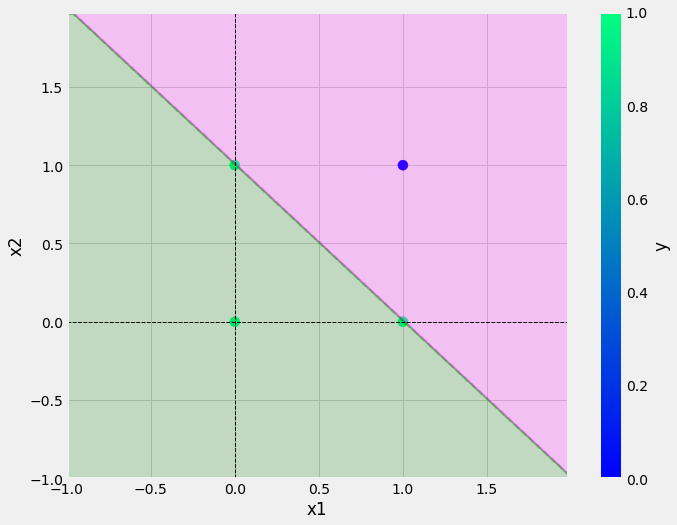

In [66]:
save_plot(df_NAND, "nand.png", model_NAND)